# Exploratory Data Analysis

## Data Exploration

### Import Necessary

In [92]:
import os
import requests
import zipfile
import shutil
import matplotlib.pyplot as plt
import random
from matplotlib.image import imread
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image


### Download dataset

In [93]:
# Kaggle dataset URL
dataset_url = "https://www.kaggle.com/api/v1/datasets/download/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign"

# Target folder
dataset_folder = "../Dataset"
os.makedirs(dataset_folder, exist_ok=True)

# Filepath for the downloaded zip file
zip_filepath = os.path.join(dataset_folder, "gtsrb-german-traffic-sign.zip")

# Check if the dataset already exists
target_folder = os.path.join(dataset_folder, "GTSRB")
if os.path.exists(target_folder):
    print(f"The dataset is already available in '{target_folder}'. Skipping download and extraction.")
else:
    # Download the dataset if the zip file doesn't already exist
    if not os.path.exists(zip_filepath):
        print(f"Downloading dataset from {dataset_url}...")
        with requests.get(dataset_url, stream=True) as response:
            response.raise_for_status()
            with open(zip_filepath, "wb") as file:
                for chunk in response.iter_content(chunk_size=8192):
                    file.write(chunk)
        print(f"Dataset downloaded and saved to {zip_filepath}")
    else:
        print(f"The dataset zip file already exists at '{zip_filepath}'. Skipping download.")

print(f"Dataset is ready in the '{target_folder}' folder.")


The dataset is already available in '../Dataset\GTSRB'. Skipping download and extraction.
Dataset is ready in the '../Dataset\GTSRB' folder.


### Import Dataset Path

In [94]:

train_path = '../Dataset/GTSRB/Train'
test_path = '../Dataset/GTSRB/Test'

### Total Classes for this dataset

In [95]:
# Count class
num_of_classes = len(os.listdir(train_path))
num_of_classes

43

### Total images in dataset for train and test

### Define the count image function

In [96]:

def count_images(folder_path):
    """
    Count the total number of .png images in the dataset folder.
    Assumes the dataset is organized into subfolders for each class.
    """
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        png_files = [f for f in files if f.endswith(".png")]
        total_images += len(png_files)
    return total_images


In [97]:
# Count images
total_training_images = count_images(train_path)
total_testing_images = count_images(test_path)

print(f"Total Training Images: {total_training_images}")
print(f"Total Testing Images: {total_testing_images}")
print(f"Total Images in Dataset: {total_training_images + total_testing_images}")


Total Training Images: 39209
Total Testing Images: 12630
Total Images in Dataset: 51839


### Creating Dictionary

In [98]:
# Define label for each class
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

### Visualize number of images in each class

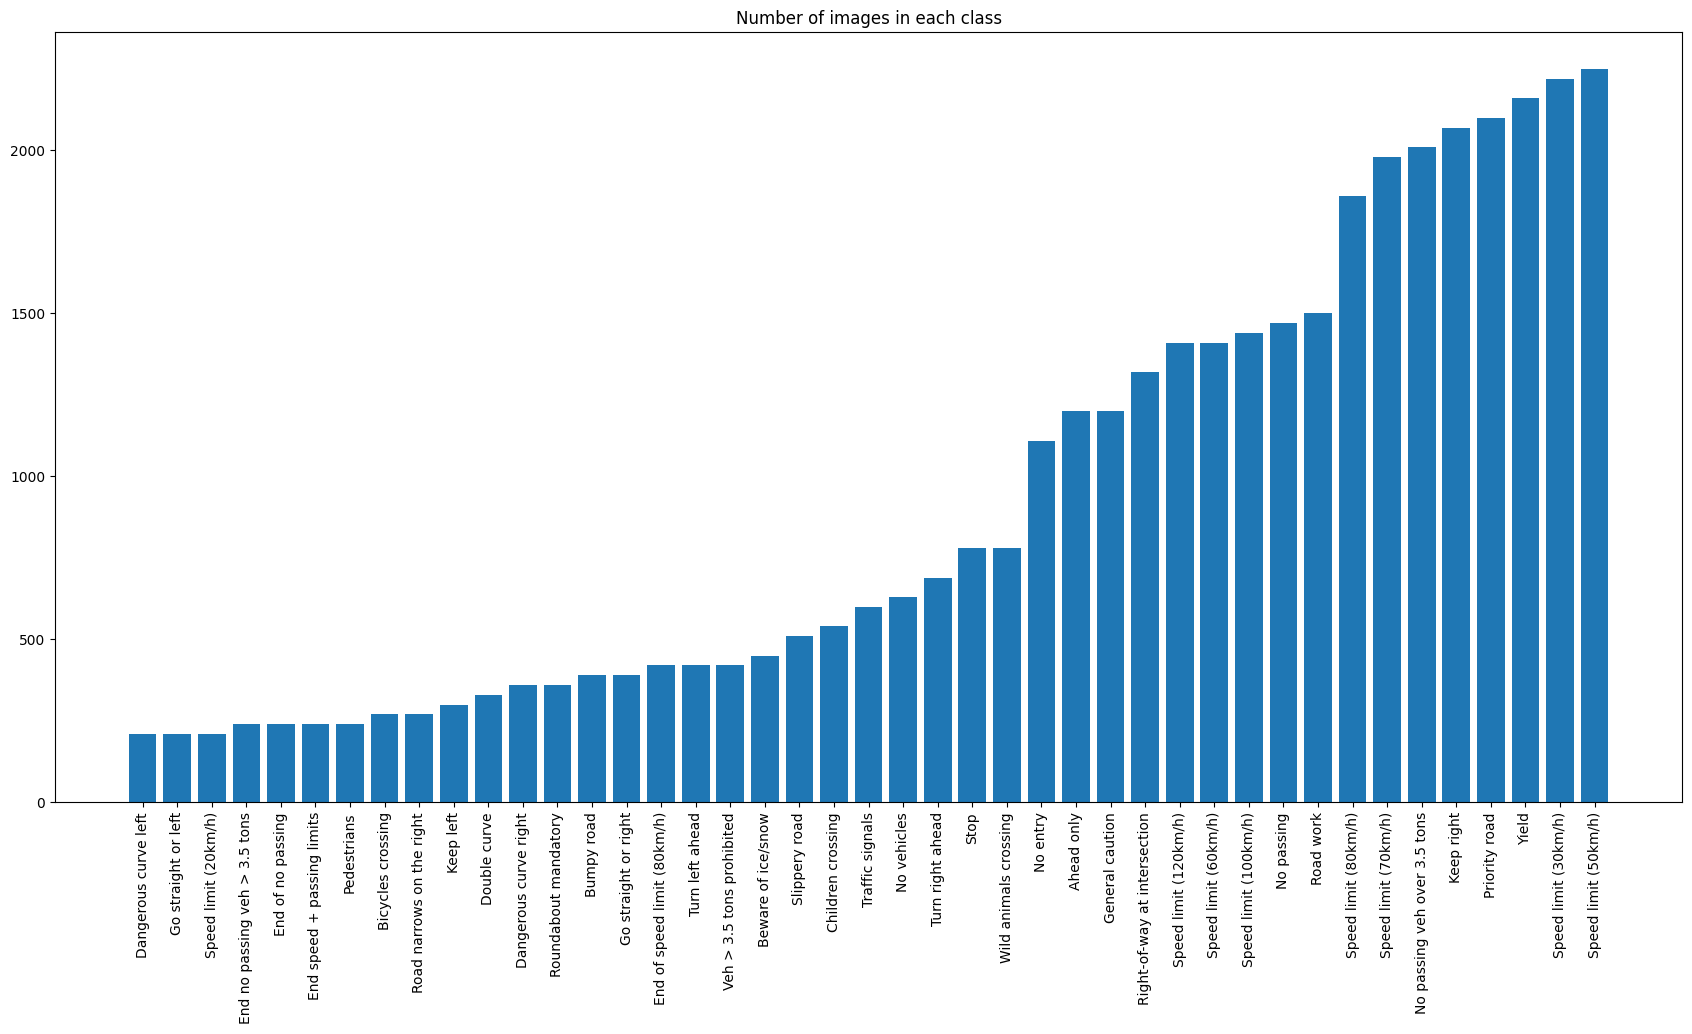

In [99]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.title("Number of images in each class")
plt.show()


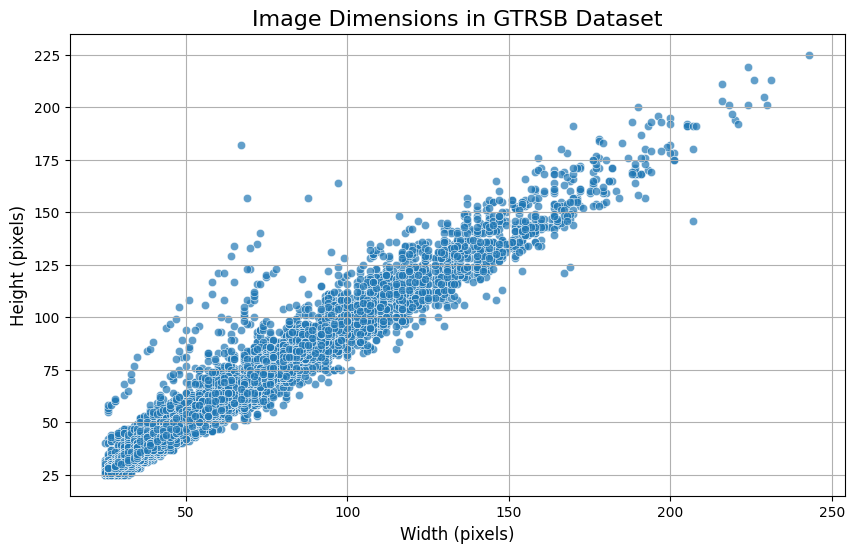

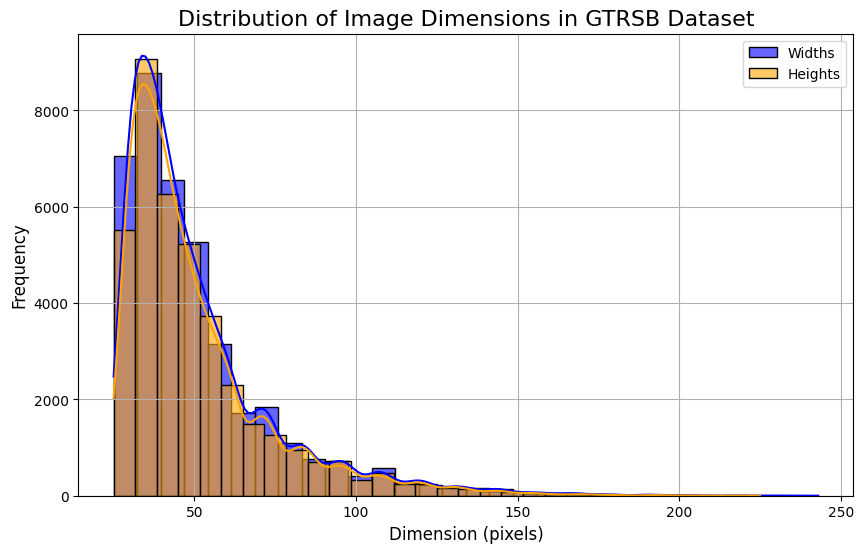

In [100]:
import seaborn as sns

# Lists to store image widths and heights
widths = []
heights = []

# Iterate over all images in the dataset
for root, dirs, files in os.walk(train_path):
    for file in files:
        if file.endswith((".png", ".jpg", ".jpeg")):  # Add other formats if necessary
            image_path = os.path.join(root, file)
            image = cv2.imread(image_path)
            
            if image is not None:
                height, width, _ = image.shape
                widths.append(width)
                heights.append(height)

# Plot the relationship between image widths and heights
plt.figure(figsize=(10, 6))
sns.scatterplot(x=widths, y=heights, alpha=0.7)
plt.title("Image Dimensions in GTRSB Dataset", fontsize=16)
plt.xlabel("Width (pixels)", fontsize=12)
plt.ylabel("Height (pixels)", fontsize=12)
plt.grid(True)
plt.show()

# Optional: Plot histograms for widths and heights
plt.figure(figsize=(10, 6))
sns.histplot(widths, bins=30, color="blue", label="Widths", kde=True, alpha=0.6)
sns.histplot(heights, bins=30, color="orange", label="Heights", kde=True, alpha=0.6)
plt.title("Distribution of Image Dimensions in GTRSB Dataset", fontsize=16)
plt.xlabel("Dimension (pixels)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


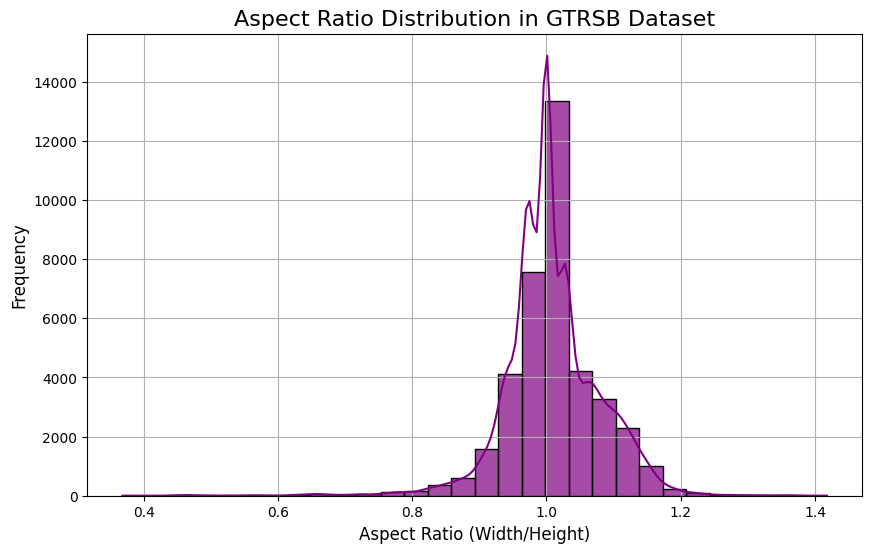

In [101]:
# List to store aspect ratios
aspect_ratios = []

# Iterate over all images in the dataset
for root, dirs, files in os.walk(train_path):
    for file in files:
        if file.endswith((".png", ".jpg", ".jpeg")):  # Add other formats if necessary
            image_path = os.path.join(root, file)
            image = cv2.imread(image_path)
            
            if image is not None:
                height, width, _ = image.shape
                if height > 0:  # Avoid division by zero
                    aspect_ratios.append(width / height)

# Plot the distribution of aspect ratios
plt.figure(figsize=(10, 6))
sns.histplot(aspect_ratios, bins=30, kde=True, color="purple", alpha=0.7)
plt.title("Aspect Ratio Distribution in GTRSB Dataset", fontsize=16)
plt.xlabel("Aspect Ratio (Width/Height)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()


### Display one image from each class

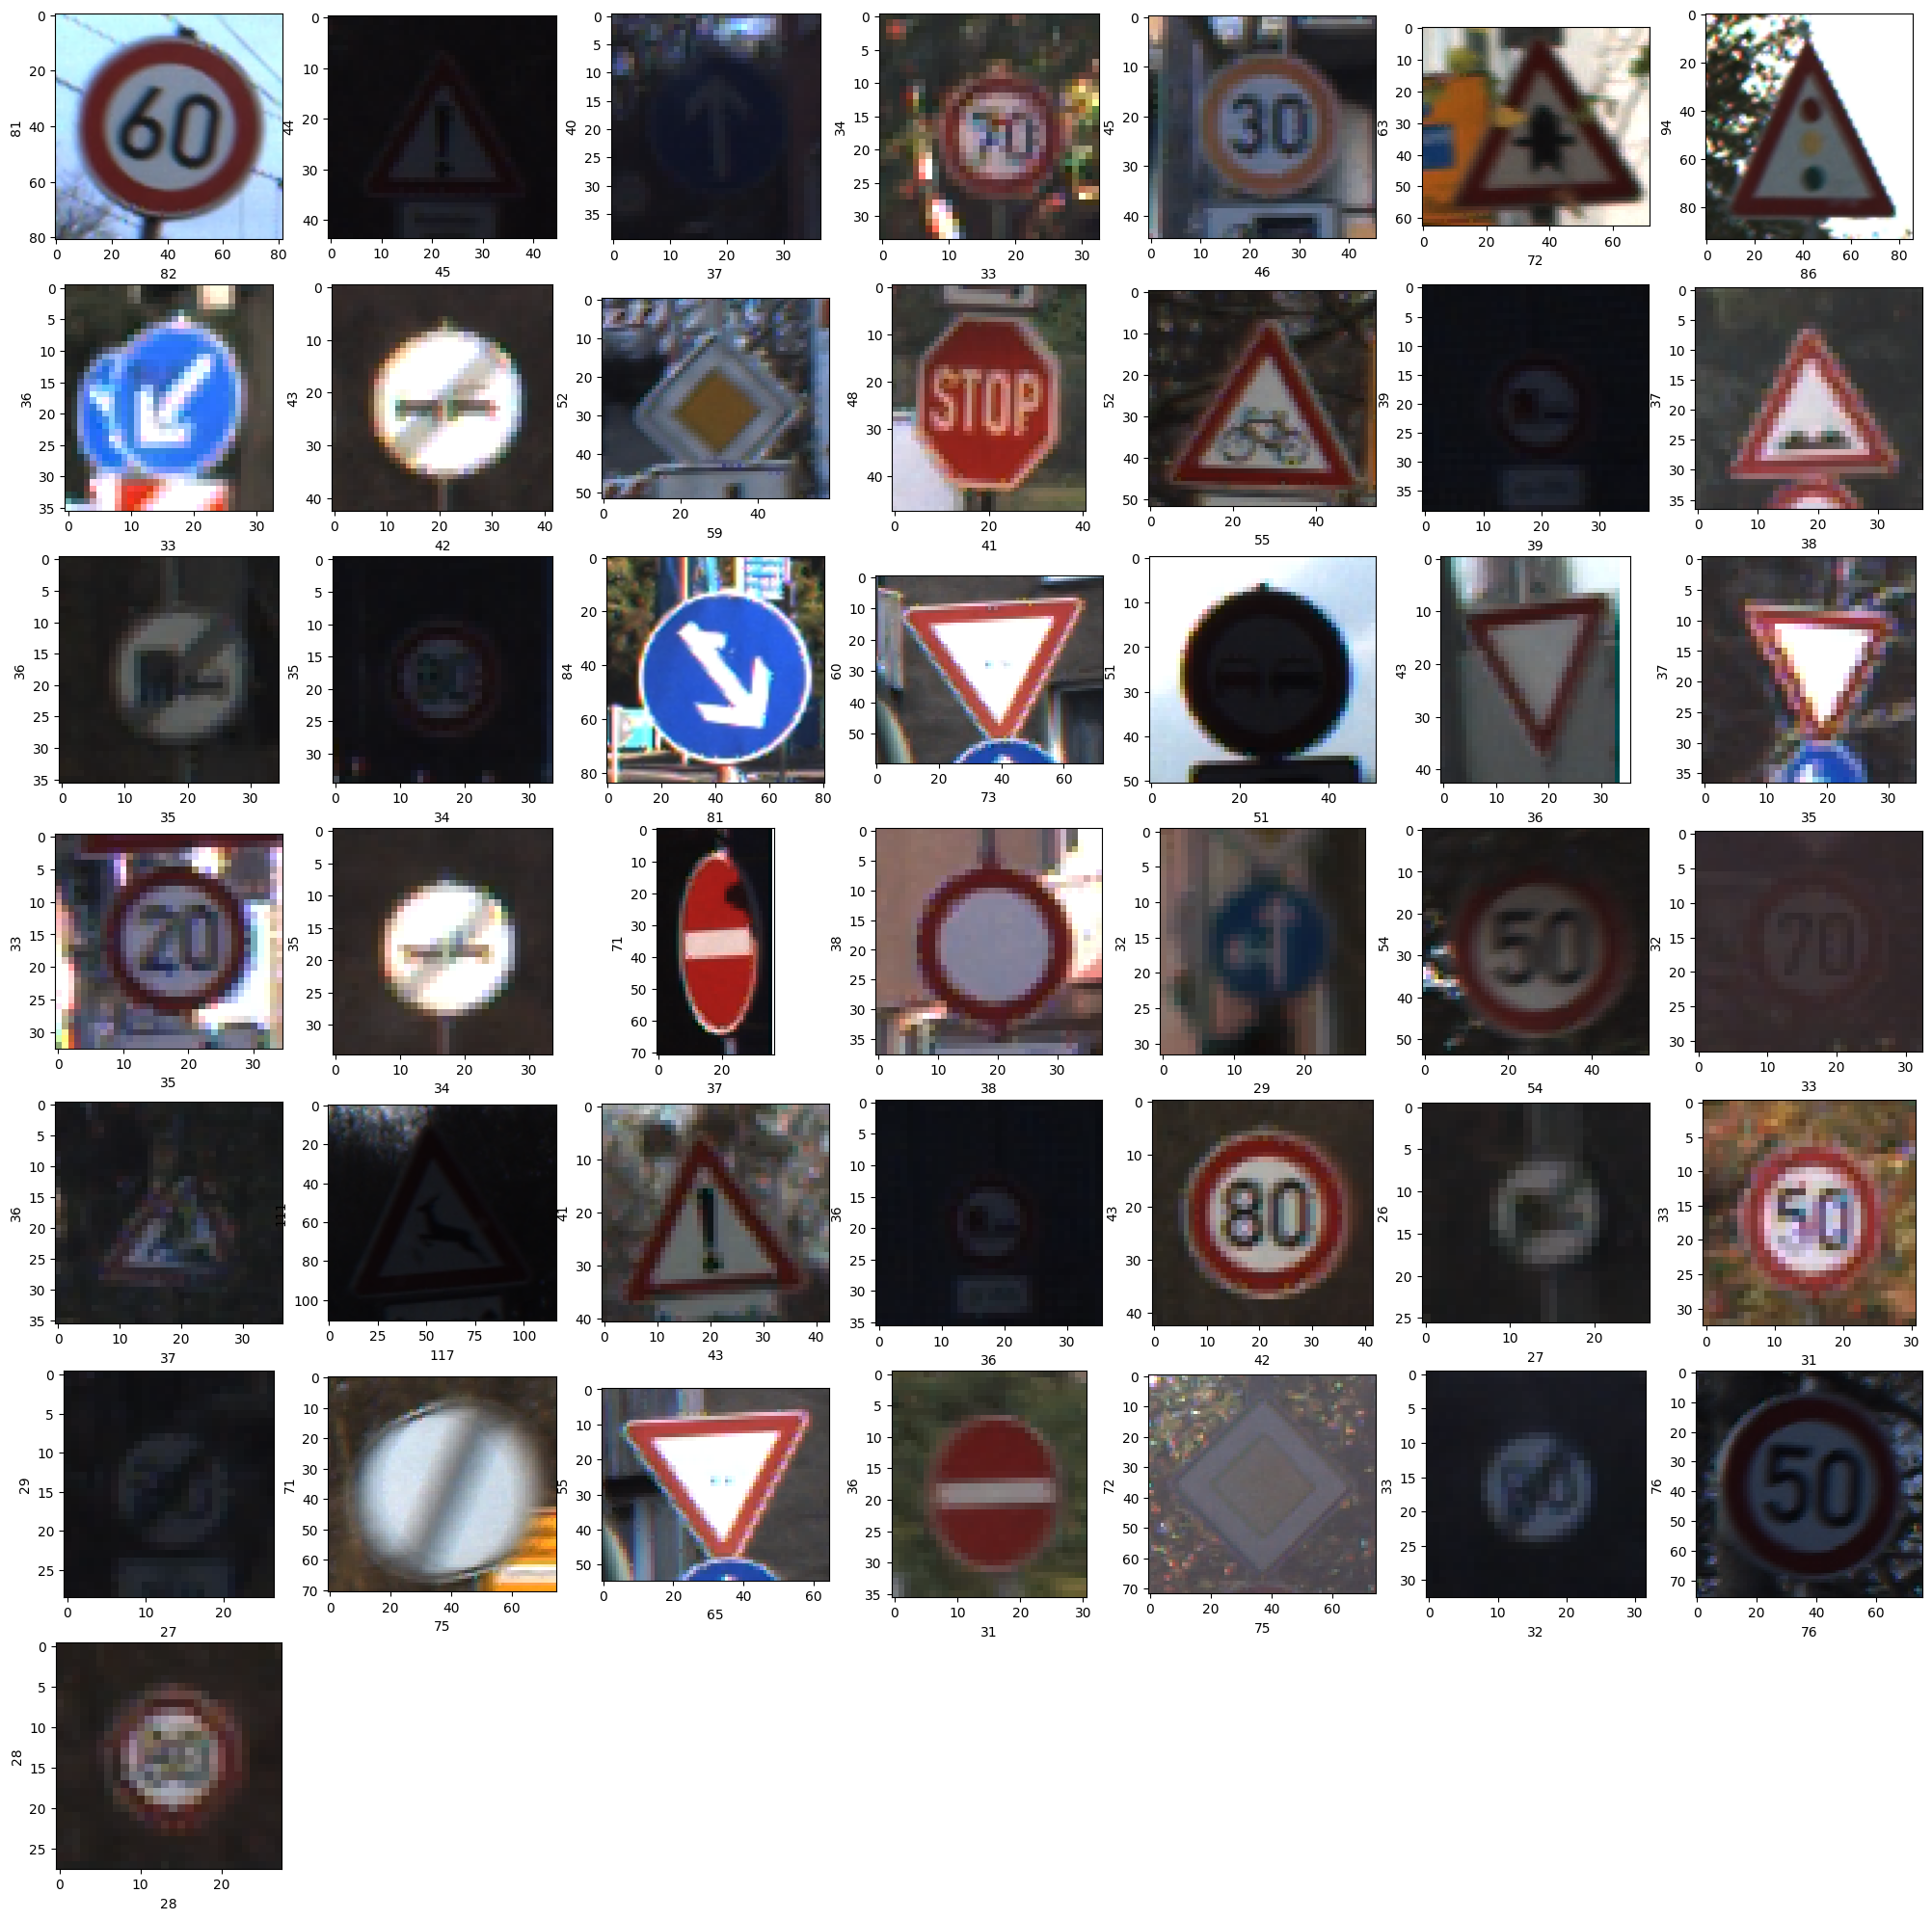

In [102]:
test = pd.read_csv('../Dataset/GTSRB/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,44):
    plt.subplot(7,7,i)
    random_img_path = '../Dataset/GTSRB/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    # plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

### Class distribution

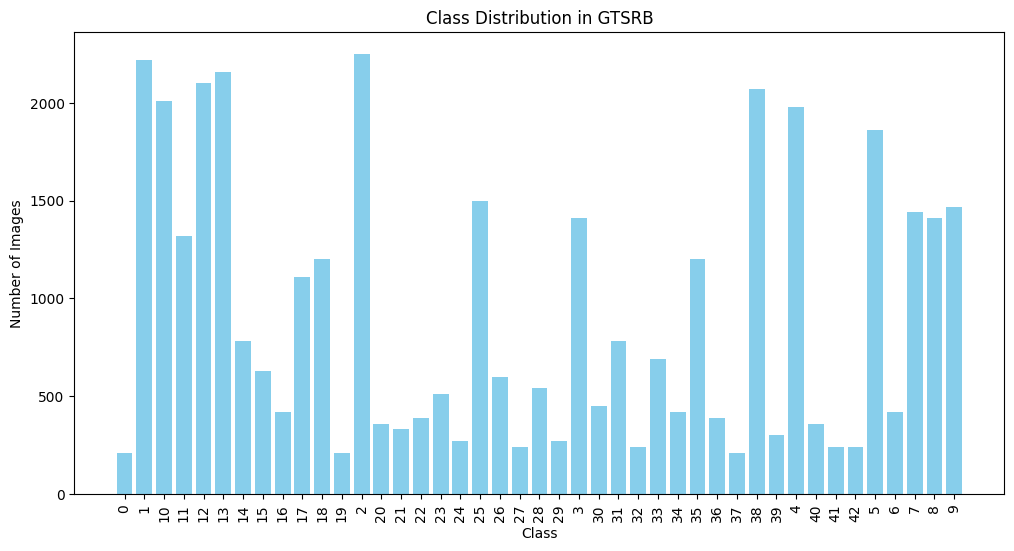

In [103]:
# Path to your Train folder
classes = sorted(os.listdir(train_path))

# Count images in each class
class_counts = []
for cls in classes:
    class_folder = os.path.join(train_path, cls)
    if os.path.isdir(class_folder):  # Ensure it's a folder, not a file
        class_counts.append(len(os.listdir(class_folder)))

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.bar(range(len(classes)), class_counts, color="skyblue")
plt.xticks(range(len(classes)), classes, rotation=90)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in GTSRB")
plt.show()


## Data Preprocessing for Traffic Sign Detection

### 1. Data Cleansing

#### a. Check corrputed files

In [104]:
import os
import cv2

def check_images(data_dir, img_extension=".png"):
    corrupted_files = []
    
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(img_extension):
                img_path = os.path.join(root, file)
                try:
                    img = cv2.imread(img_path)
                    if img is None:  # Check if the image is readable
                        corrupted_files.append(img_path)
                except Exception as e:
                    corrupted_files.append(img_path)
    
    return corrupted_files

corrupted = check_images(train_path)
print("Corrupted files:", corrupted)

Corrupted files: []


#### b. Resize image and normalize pixel value

In [105]:
def preprocess_and_save(data_dir, output_dir, img_size=(30,30)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)  # Create output directory if it doesn't exist

    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".ppm") or file.endswith(".png") or file.endswith(".jpg"):  # Adjust based on format
                # Construct paths
                img_path = os.path.join(root, file)
                label = os.path.basename(root)  # Folder name is the label
                label_dir = os.path.join(output_dir, label)
                
                # Create label directory if it doesn't exist
                if not os.path.exists(label_dir):
                    os.makedirs(label_dir)

                # Load and preprocess image
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)  # Resize
                img = img / 255.0  # Normalize pixel values
                
                # Convert normalized image back to uint8 for saving (0-255 range)
                img_uint8 = (img * 255).astype('uint8')

                # Save preprocessed image
                output_path = os.path.join(label_dir, file)
                cv2.imwrite(output_path, img_uint8)
                print(f"Saved preprocessed image to: {output_path}")


preprocessed_data_dir = "../Preprocessing/cleaned_training_data"  # Replace with the output folder

# Preprocess and save images
preprocess_and_save(train_path, preprocessed_data_dir)


Saved preprocessed image to: ../Preprocessing/cleaned_training_data\0\00000_00000_00000.png
Saved preprocessed image to: ../Preprocessing/cleaned_training_data\0\00000_00000_00001.png
Saved preprocessed image to: ../Preprocessing/cleaned_training_data\0\00000_00000_00002.png
Saved preprocessed image to: ../Preprocessing/cleaned_training_data\0\00000_00000_00003.png
Saved preprocessed image to: ../Preprocessing/cleaned_training_data\0\00000_00000_00004.png
Saved preprocessed image to: ../Preprocessing/cleaned_training_data\0\00000_00000_00005.png
Saved preprocessed image to: ../Preprocessing/cleaned_training_data\0\00000_00000_00006.png
Saved preprocessed image to: ../Preprocessing/cleaned_training_data\0\00000_00000_00007.png
Saved preprocessed image to: ../Preprocessing/cleaned_training_data\0\00000_00000_00008.png
Saved preprocessed image to: ../Preprocessing/cleaned_training_data\0\00000_00000_00009.png
Saved preprocessed image to: ../Preprocessing/cleaned_training_data\0\00000_0000

#### c. Check for missing labels

In [106]:
def verify_labels(data_dir, expected_classes):
    missing_labels = []

    for root, dirs, files in os.walk(data_dir):
        if root == data_dir:  # Skip the root directory itself
            continue

        # Extract the label from the directory name
        label = os.path.basename(root)

        # Check if the label is in the list of expected classes
        if label not in expected_classes:
            missing_labels.append(root)

    return missing_labels

expected_classes = [str(i) for i in range(43)]  # GTSRB has 43 classes

missing_labels = verify_labels('../Preprocessing/cleaned_training_data', expected_classes)
print("Missing labels:", missing_labels)

Missing labels: []


#### d. Load the preprocessed data

In [107]:
import os
import cv2
import numpy as np

def load_preprocessed_data(preprocessed_data_dir, img_size=(30,30)):
    image_data = []
    image_labels = []
    class_labels = sorted(os.listdir(preprocessed_data_dir))  # Sorted class labels
    
    for label in class_labels:
        label_dir = os.path.join(preprocessed_data_dir, label)
        if not os.path.isdir(label_dir):
            continue
        
        for file in os.listdir(label_dir):
            if file.endswith(".ppm") or file.endswith(".png") or file.endswith(".jpg"):  # Adjust based on format
                img_path = os.path.join(label_dir, file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)  # Ensure the size matches
                img = img / 255.0  # Normalize the image
                image_data.append(img)
                image_labels.append(int(label))  # Convert string label to integer
    
    return np.array(image_data), np.array(image_labels)

# Load preprocessed data
preprocessed_data_dir = "../Preprocessing/cleaned_training_data"  # Replace with the path
image_data, image_labels = load_preprocessed_data(preprocessed_data_dir)

print(image_data.shape, image_labels.shape)


(39209, 30, 30, 3) (39209,)


#### d. Detecting outliers

Number of Outliers Detected: 17002


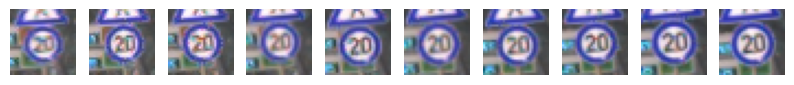

In [108]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
# Step 2: Flatten Images for PCA
images_flat = image_data.reshape(image_data.shape[0], -1)

# Step 3: Perform PCA for Dimensionality Reduction
pca = PCA(n_components=50)  # Reduce to 50 principal components
images_pca = pca.fit_transform(images_flat)

# Step 4: Detect Outliers using DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)  # Adjust eps and min_samples as needed
outlier_labels = dbscan.fit_predict(images_pca)

# Outliers have label -1
outliers = np.where(outlier_labels == -1)[0]

# Step 5: Visualize Outliers
def visualize_outliers(images, outlier_indices, n_samples=10):
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(outlier_indices[:n_samples]):
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(images[idx])
        plt.axis('off')
    plt.show()

print(f"Number of Outliers Detected: {len(outliers)}")
visualize_outliers(image_data, outliers)

#### e. Removing Outliers

In [109]:
clean_data = np.delete(image_data, np.unique(outliers[0]), axis=0)
clean_labels = np.delete(image_labels, np.unique(outliers[0]), axis=0)

print(clean_data.shape, clean_labels.shape)

(39208, 30, 30, 3) (39208,)
